# Social Computing/Social Gaming - Summer 2020

# Exercise Sheet 5 : K-Means and EVE

In this exercise, we will revisit the K-means clustering algorithm from the lecture and apply it to data gathered from the sandbox MMO *EVE Online*. We will explore whether we can find indications for Radoff's player types when applying the algorithm with k=4. As a refresher, Radoff's model posits that players can be divided into 4 groups: Socializers, achievers, explorers and killers.

For those of you unfamiliar with EVE, here is a brief explanation that should help in working with the data: In Eve, a player takes control over a clone in a fictional galaxy with a fully-functioning, player-driven economy. There are no set roles, but players usually form alliances and choose roles based on what they like to do most. Much of the game revolves around spaceship combat, but many players concentrate on mining and processing resources which are needed to build ships and stations. Other players enjoy a more lone-wolf style of game and either explore the galaxy or hunt other players. EVE's most unique feature is the doctrine of no safe spaces: There are zones in which killing is prohibited, but the NPC law enforcement does not work as a prevention unit, only as a force of retaliation. This makes preying on new players much easier than in other games that do have safe havens.

If you want to know more about the game or feel that this explanation was not helpful enough, the Wikipedia article about EVE Online is a good place to start.

Before the actual task starts, try to think of general behavior patterns that would describe EVE players falling into Radoff's categories. What characterizes achievers? How would you distinguish them from killers?

### The Data:

Below, you will find the code used to gather the data, given a number of character IDs from the game. **Important: Do not run this code! It only serves as part of the explanation for the data!** We have commented it out for you. 

For every player, the following information was retrieved:

- soloRatio: Measures how many kills the player has achieved without the assistance of others
- secStatus: An in-game metric that measures the criminal activity: Killing players in safe zones (without a valid reason) lowers the security status
- shipsDestroyed: The number of ships the character has destroyed (alone or with help of others)
- combatShipsLost: The amount of ships lost that are classified as combat ships
- miningShipsLost: These are ships used for harvesting resources and have limited to no combat capabilities
- exploShipsLost: These ships are used to explore the galaxy and only have limited defensive capabilities
- otherShipsLost: This category consists of ships that could be considered "support" classes: Freighters (i.e. cargo ships), logistics (i.e. a "healer" in a typical MMO), etc.

Note that losing ships might not always be an indication of what ships players actually use the most (which is what we want to know). It could be possible that some players just never lose a certain type of ship, right? However, given the violent nature of the game and statistics like these (http://evemaps.dotlan.net/stats) it is very unlikely.

Based on this, we will assume the following regarding the types of players:

- Explorers: Low kill/death ratio, high use of exploration ships, rather low kill numbers, high security status
- Socializers: Low kill/death ratio, high security status, low soloRatio, high amount of non-combat ships lost
- Achievers: High kill/death ratio ? (Depends on what you define as "achieving")
- Killers: High kill/death ratio, high soloRatio, low security status, losing virtually only combat ships

In [ ]:
# import json
# import urllib
# import pandas as pd
# import re
# import requests
# import html
# import json
# import math


# # Create the dataframe to store everything in:
# columns = ['characterID', 'soloRatio', 'secStatus', 'shipsDestroyed', 'combatShipsLost', 'miningShipsLost', 'exploShipsLost', 'otherShipsLost']
# data = pd.DataFrame()
# character_IDs = pd.read_csv(r'EVEPlayerStats.csv')
# IDList = character_IDs['characterID'].values.tolist()

# IDList = IDList[:500]

# for characterID in IDList:
#     print(characterID)
#     end = False;
#     i =2;
#     combatShips = 0
#     exploShips = 0
#     miningShips = 0
#     otherShips = 0
#     #Get general info: Name, soloratio, secStatus and handle JSON not existing
#     try:
#         link = "https://zkillboard.com/api/stats/characterID/" + str(characterID) + "/"
#         f = requests.get(link)
#         file= json.loads(f.text)
#     except ValueError:
#         print("couldnt decode")
#     if 'gangRatio' not in file:
#         print("next")
#     else:
        
#         soloRatio = 100- file['gangRatio']
#         info = file['info']
#         secStatus = info['secStatus']
#         groups = file['groups']

#         # numbers for groups are already present in the JSON
#         frame = pd.DataFrame.from_dict(groups)
#         shipLosses =pd.DataFrame(frame.iloc[1])
#         for key, value in shipLosses.iterrows():
#             if (key == "25" or key=="29" or key == "31" or key == "1246" or key == "1250" or key == "311" or key == "361" or key == "363" or
#             key == "365" or key == "417" or key == "471" or key == "1025" or key == "1249" or key == "1273" or key == "1276"):
#                 #TODO ignore:
#                 print("ignoring")
#             elif key == "380" or key == "513" or key == "832" or key == "1202" or key == "1527":
#                 if math.isnan(value[0]):
#                     otherShips+=0
#                 else:
#                     otherShips+=int(value[0])
#             elif key == "463" or key == "543" or key == "883" or key == "941" or key == "1283":
#                 if math.isnan(value[0]):
#                     miningShips+=0
#                 else:
#                     miningShips+=int(value[0])
#             elif key == "830":
#                 if math.isnan(value[0]):
#                     exploShips+=0
#                 else:
                    
#                     exploShips+=int(value[0])
#             else:
#                 if math.isnan(value[0]):
#                     combatShips+=0
#                 else:
#                     combatShips+=int(value[0])

#         data = data.append({'characterID': characterID, 'soloRatio': soloRatio, 'secStatus': secStatus, 'shipsDestroyed': 0, 'combatShipsLost': combatShips, 
#                             'miningShipsLost': miningShips, 'exploShipsLost': exploShips, 'otherShipsLost': otherShips}, ignore_index = True)

# if len(data) > 0:
#     data.to_csv(r'C:\Users\jgott\Documents\EVEPlayerStatsNew.csv')

## Task 5.1: Preparation

Now that you are armed with all the knowledge needed, let us begin. First, read the .csv that you downloaded with this exercise into a dataframe and drop the `Unnamed: 0` and `characterID` columns. We don't need them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#TODO:
df = pd.read_csv('EVEPlayerStats.csv')
df = df.drop(['Unnamed: 0', 'characterID'], axis=1)
df.head()

,combatShipsLost,exploShipsLost,miningShipsLost,otherShipsLost,secStatus,shipsDestroyed,soloRatio
0,8.0,4.0,5.0,0.0,5.003100,1.0,10.0
1,97.0,5.0,1.0,0.0,2.817807,6251.0,6.0
2,61.0,0.0,0.0,0.0,-2.015310,752.0,0.0
3,22.0,1.0,0.0,4.0,5.002769,43.0,5.0
4,74.0,0.0,1.0,1.0,3.090204,301.0,7.0


In [2]:
df.describe()

,combatShipsLost,exploShipsLost,miningShipsLost,otherShipsLost,secStatus,shipsDestroyed,soloRatio
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,128.236842,2.333333,2.271930,2.741228,2.038484,218.850877,10.164474
std,250.907270,7.583286,9.790361,6.333838,3.537742,941.711117,17.149931
min,0.000000,0.000000,0.000000,0.000000,-9.999997,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,-0.069590,0.000000,1.000000
50%,54.000000,0.500000,0.000000,0.000000,3.193884,0.000000,5.000000
75%,149.000000,2.000000,2.000000,3.000000,5.002092,0.000000,9.000000
max,3416.000000,139.000000,196.000000,70.000000,5.176040,11269.000000,100.000000


In [3]:
df.shape

(456, 7)

## Task 5.2: Normalizing & Clustering

As you might have seen, the value ranges differ greatly across the metrics. Where the number of kills can reach up to 10.000, the security status rarely exceeds 5. This creates an imbalance, as the calculation of distance will obviously be impacted a lot more by kill counts than security status. To rectify this and let all metrics influence the result in an equal manner, we need to normalize the data. 

**1.** Go through the dataframe and normalize all values by dividing by the max value for each column.

There is still one problem with the dataset: Even normalized, the clustering 'favors' those players with higher numbers: For example, where we to posit that explorers have a high amount of exploration ships lost, then a player with 200 lost ships would rather be classified as an explorer than a player with 5 lost ships, even if the former lost 2000 non-exploration ships and the latter lost only 2 non-exploration ships. EVE Online has been around since 2003, so there exist players who have played the game extensively for 13 years, while some others might have played for only 2. To mitigate this, we should look at ratios in ship losses: How big is the percentage of lost combat/exploration/mining/other ships given the total amount of ships lost? 

**2.** Convert the absolute numbers into ratios.  


**3.** Cluster the dataset with the k-Means algorithm.

**Hint:** For the clustering we will use the k-means algorithm provided by the scikit-learn library. Import the algorithm and use the `fit()` function to let the algorithm do its work. Remember to set the amount of clusters to 4. 

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# TODO 1: Normalize all values by dividing by the max value for each column.
column_max = df.max()
df = df/column_max

# TODO 2: Convert the absolute numbers into ratios.
total_ships = df['combatShipsLost'] + df['exploShipsLost'] + df['miningShipsLost'] + df['otherShipsLost']
df['combatShipsLost'] = df['combatShipsLost']/total_ships
df['exploShipsLost'] = df['exploShipsLost']/total_ships
df['miningShipsLost'] = df['miningShipsLost']/total_ships
df['otherShipsLost'] = df['otherShipsLost']/total_ships

# TODO 3: Cluster the dataset with the k-Means algorithm.
kmeans = KMeans(n_clusters=4, random_state=0).fit(df)
kmeans.labels_

array([2, 2, 3, 2, 2, 3, 1, 2, 2, 0, 3, 0, 3, 2, 2, 3, 2, 0, 0, 3, 2, 2,
       3, 2, 3, 3, 2, 2, 1, 2, 3, 2, 3, 3, 0, 3, 2, 3, 2, 2, 3, 2, 1, 2,
       3, 2, 2, 0, 0, 2, 2, 0, 2, 2, 3, 2, 2, 3, 2, 0, 3, 0, 2, 2, 2, 0,
       3, 0, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 3, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 3, 3, 2, 3, 0, 3, 3, 0, 0,
       2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 0, 0, 3, 3, 0, 3, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 3, 2, 2, 3, 3, 1, 3, 3, 2, 2, 1, 2, 2, 0, 0,
       2, 3, 2, 1, 2, 2, 0, 0, 3, 2, 3, 3, 1, 2, 3, 0, 0, 2, 0, 1, 0, 3,
       3, 1, 2, 2, 3, 2, 3, 2, 2, 2, 0, 2, 3, 2, 3, 2, 0, 0, 3, 2, 2, 2,
       3, 0, 3, 0, 1, 2, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 0, 0, 2, 3, 2, 0,
       0, 2, 2, 2, 1, 2, 3, 2, 0, 1, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 1, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 0, 3, 0, 2,
       2, 3, 2, 3, 3, 3, 0, 2, 3, 3, 3, 3, 0, 3, 3, 3, 0, 2, 2, 3, 2, 2,
       2, 0, 2, 0, 2, 3, 3, 3, 2, 0, 2, 2, 3, 2, 0,

In [5]:
df.head()

,combatShipsLost,exploShipsLost,miningShipsLost,otherShipsLost,secStatus,shipsDestroyed,soloRatio
0,0.041355,0.508166,0.450479,0.000000,0.966588,0.000089,0.10
1,0.408754,0.517802,0.073443,0.000000,0.544394,0.554708,0.06
2,1.000000,0.000000,0.000000,0.000000,-0.389354,0.066732,0.00
3,0.090993,0.101646,0.000000,0.807360,0.966524,0.003816,0.05
4,0.527710,0.000000,0.124287,0.348003,0.597021,0.026710,0.07


## Task 5.3: Analysing the results

### **a)** Heatmap

Since we have 7 features for each player in total, our datapoints lie in a 7-dimensional space. It can be tricky to read a 7-dimensional graph, so we will first use a heatmap to analyze our data. A heatmap is a data visualization technique that shows the data as color in two dimensions.

**1.** Use the seaborn library to generate a heatmap. For readability purposes, display the first 20 players from the dataset **only**.  
**Hint:** If you feel like the graph is too small, scale it up a bit.

**2.** From these 20 entries, choose 4 that you think are the most representative for each of Radoff's player groups and briefly explain why you chose them based on the heatmap.

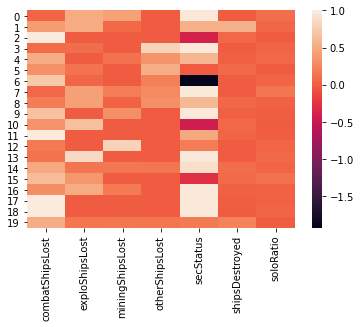

In [6]:
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# TODO 1:
ax = sns.heatmap(df[:20])

**TODO 2: Write your observations here:**
From the above heatmap, 
* lets look at player at index **6**. He has very low security status, relatively high solo ratio, lost mostly combat ships which is a perfect description for *Killers*
* next lets take the player at index **13**. He had lost more exploration ships and also have high security status which makes him an *Explorer*
* next one be the player at index **0**. He belongs to the category *Socializer* as he has high security status and lost more non combat ships.
* last, lets pick the one at index **2**. With moderately low security status and high combat ships lost he qualifies to be an *Achiever*

### **b)** t-SNE 

Heatmaps are nice, but if we want to display large amounts of data, they become unreadable. Therefore, we introduce an algorithm called [t-SNE](http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf ) that can transform a high dimensional dataset into a 2 dimensional plot. For more information you can check out the linked paper. For a simple but intuitive explaination have a look at [this video](https://www.youtube.com/watch?v=NEaUSP4YerM). 

**1.** Run the given code to generate a t-SNE graph. Look at the plot and choose a cluster which you want to analyze. From this cluster choose 4-5 players, analyze their stats and describe your observations. Can you tell what kind of player type the cluster represents in Radoff's model? Can you explain the meaning of the distance between the clusters?  
**Hint**: You can see the assigned clusters for each player with the list `kmeans.labels_`


**Note:** If you get the impression that the clustering is not very accurate do not feel discouraged as the data set does not contain enough information about the other activities of the players besides ship killing. 

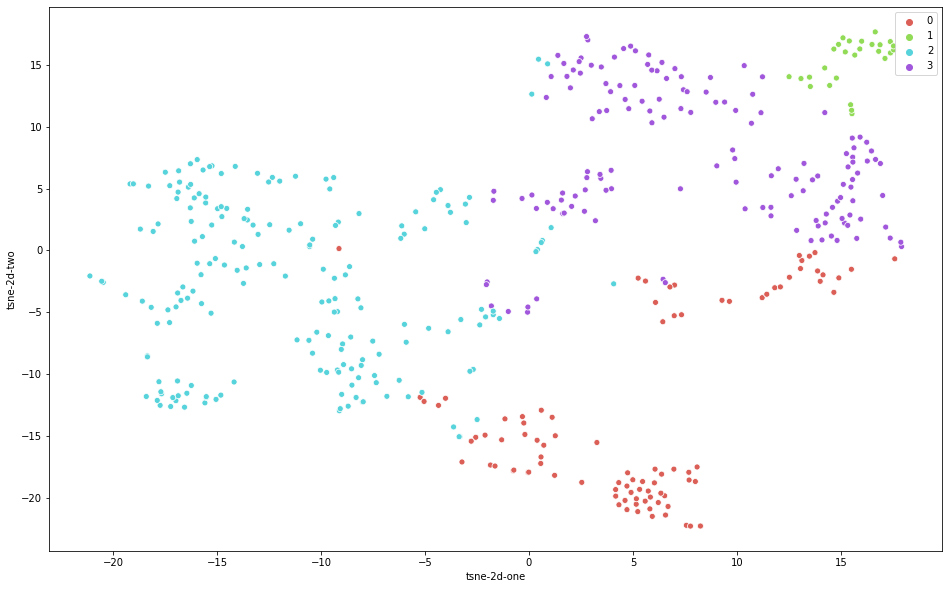

In [7]:
# t-SNE Graph
def tsne(tempData):
    tsne = TSNE(n_components=2, random_state=0)
    X_2d = tsne.fit_transform(tempData)

    new = tempData.copy()
    new['tsne-2d-one'] = X_2d[:,0]
    new['tsne-2d-two'] = X_2d[:,1]

    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x = "tsne-2d-one", y = "tsne-2d-two",
        hue = kmeans.labels_,
        palette = sns.color_palette("hls", 4),
        data = new,
        legend = "full"
    )
    
tsne(df)

In [8]:
labels = np.array(kmeans.labels_)
index_0 = np.where(labels == 0)[0]
index_1 = np.where(labels == 1)[0]
index_2 = np.where(labels == 2)[0]
index_3 = np.where(labels == 3)[0]

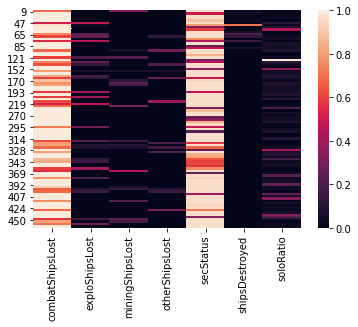

In [9]:
sns.heatmap(df.iloc[index_0])

Players in this cluster have *high security status and uses combat ships* - This is not applicable for any categroy but better suited for **Explorers** among other categories.

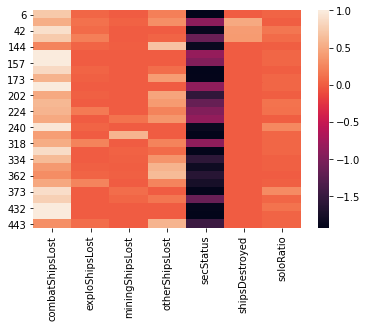

In [10]:
sns.heatmap(df.iloc[index_1])

Players in this clustered have *very low security status and uses majorly combat ships* - This is better suited for **Killers**

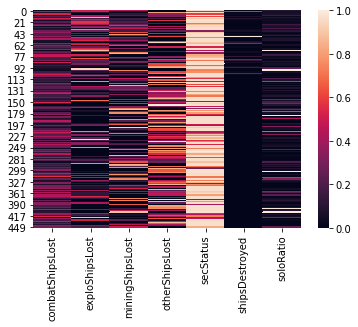

In [11]:
sns.heatmap(df.iloc[index_2])

Players in this cluster have *reasonbly high security status and uses mostly all the ships, less of combat ships* - This is better suited for **Socializers**

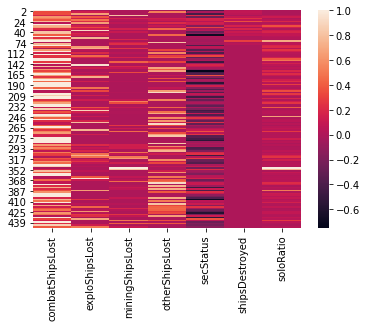

In [12]:
sns.heatmap(df.iloc[index_3])

Players in this cluster have *not so bad security status and uses all the ships* - This is better suited for **Achievers**

**TODO: Write your observations here:**
* **Label 0**: high security status and uses combat ships. Although this definition is not applicable for any of the categories we can assign it to *Explorers* as the other ones are well explained
* **Label 1**: very low security status and uses majorly combat ships - *Killers*
* **Label 2**: reasonbly high security status and uses mostly all the ships, less of combat ships - *Socializers*
* **Label 3**: not so bad security status and uses all the ships - *Achievers*

Also, I observed that the players we picked among the first 20 players using heatmap are very well clustered into their respective groups. <br>

The distance between the clusters here implies how different the clusters are. For example, the clusters which have high security status (label 0 and 2) are well separated from the players with low security status (label 1,3). The actual distance is the centroids distance in KMeans.

## Task 5.4: Comparing results to other games

Take a look at this clustering, which clusters players from the game *Battlefield 2: Bad Company 2* into seven different categories:

| Name             | % of players | characteristics                                                         |
|------------------|--------------|-------------------------------------------------------------------------|
|snipers           |   7.4        |median spm, overall low-middling values, high dpm, highest accuracy      |
|soldiers          |   27.9       |median spm, overall low-middling values, high dpm                        |
|assault-engineers |   13.1       |similar to soldiers, but higher skill, high k/d ratios                   |
|target dummies    |   26.0       |lowest scores except dpm                                                 |
|trainee veterans  |   10.7       |comparable to veterans, but lower rank and playtime                      |
|assassins         |   10.9       |highest rank in all k/d ratios, highest kpm, low playtime, low dpm       |
|veterans          |   4.1        |high playtime, second rank in most features, highest overall skill level |

Compare this to the clustering we did and discuss the applicability of Radoff's model to games of different genres, based upon these two cluster results.  
**Hint:** To compare it to EVE, first think how (if at all) the 7 categories could be condensed into 4.

**TODO: Write your observations here:**

The above 7 categories can be condensed to 4 by, <br>
**Categroy 1:** grouping **veterans and assault-engineers** together as they have to be highly skilled <br>
**Categroy 2:** grouping **soldiers, target dummies and trainee veterans** together as they are still improving in their respective skills category <br>
**Categroy 3:** **snipers** <br>
**Categroy 4:** **assassins** <br>

Thus, Radoff's model can be applied to *Battlefield 2: Bad Company 2* as well.